# Importing Libraries

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Training Image Preprocessing


In [26]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'D:/fruit vegetable detection/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


# Validation Image Preprocessing

In [27]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'D:/fruit vegetable detection/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 351 files belonging to 36 classes.


# Building Model

In [28]:
cnn = tf.keras.models.Sequential()

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [33]:
cnn.add(tf.keras.layers.Flatten())

In [34]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [35]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [36]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

# Compiling and Training 

In [37]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 402ms/step - accuracy: 0.0279 - loss: 8.2913 - val_accuracy: 0.0285 - val_loss: 3.5833
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 346ms/step - accuracy: 0.0286 - loss: 3.5817 - val_accuracy: 0.0285 - val_loss: 3.5818
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 344ms/step - accuracy: 0.0311 - loss: 3.5763 - val_accuracy: 0.0313 - val_loss: 3.5740
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 349ms/step - accuracy: 0.0379 - loss: 3.5623 - val_accuracy: 0.0427 - val_loss: 3.5583
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 340ms/step - accuracy: 0.0571 - loss: 3.5128 - val_accuracy: 0.0598 - val_loss: 3.5394
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 345ms/step - accuracy: 0.0575 - loss: 3.5035 - val_accuracy: 0.1026 - val_loss: 3.4819
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 340ms/step - accuracy: 0.0645 - loss: 3.4673 - val_accuracy: 0.1168 - val_loss: 3.4685
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 343ms/step - accuracy: 0.0905 - loss: 3.4057 - val_accu

In [40]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.9692 - loss: 0.1272
Training accuracy: 0.9691813588142395


In [41]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.9516 - loss: 0.5830
Validation accuracy: 0.9515669345855713


# Saving Model

In [46]:
cnn.save("fruit_model.keras")


In [47]:
training_history.history #Return Dictionary of history

{'accuracy': [0.02792937308549881,
  0.02857142873108387,
  0.031139647588133812,
  0.03788122162222862,
  0.05714285746216774,
  0.057463884353637695,
  0.06452648341655731,
  0.09052969515323639,
  0.11139646917581558,
  0.13386838138103485,
  0.1881219893693924,
  0.24012841284275055,
  0.2597110867500305,
  0.31685394048690796,
  0.3810593783855438,
  0.45971107482910156,
  0.5046548843383789,
  0.5534510612487793,
  0.6073836088180542,
  0.6333868503570557,
  0.6844301819801331,
  0.7296950221061707,
  0.748314619064331,
  0.7935794591903687,
  0.8067415952682495,
  0.8340288996696472,
  0.8593900203704834,
  0.8642054796218872,
  0.8648475408554077,
  0.8812199234962463,
  0.9052969217300415,
  0.9008025527000427],
 'loss': [8.29133415222168,
  3.5817160606384277,
  3.576282501220703,
  3.56231689453125,
  3.512821912765503,
  3.503500461578369,
  3.467284679412842,
  3.40571928024292,
  3.338162660598755,
  3.249931573867798,
  3.0486221313476562,
  2.881791114807129,
  2.832393

In [48]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [49]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Calculating Accuracy of Model Achieved on Validation Set

In [50]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.15669345855713 %


# Accuracy Visualisation

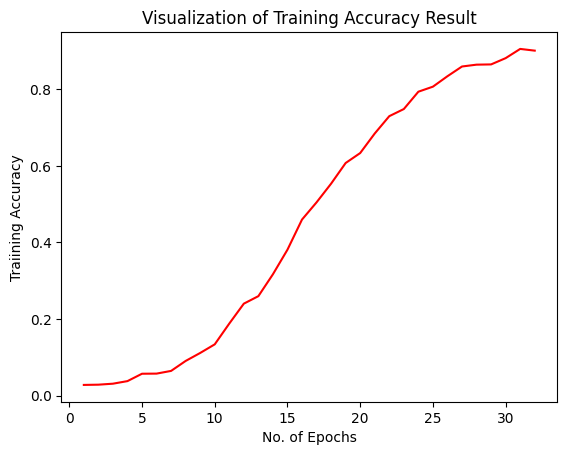

In [51]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

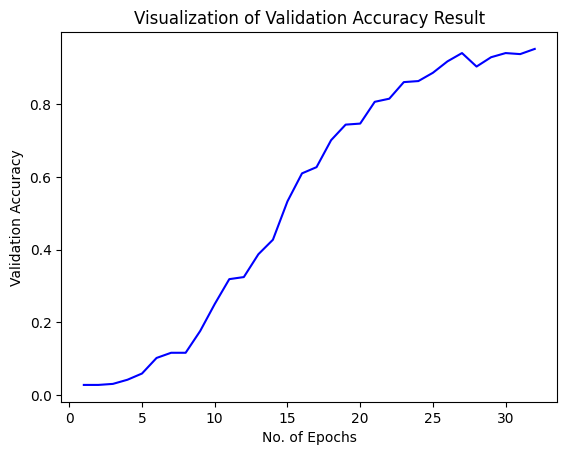

In [52]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()